# Project 1: SAT & ACT Analysis

## Problem Statement

In 2016, the College Board released a new SAT format to reflect changing trends in college education and to better prepare students for college [<sup>1</sup>](#fn1). While test preferences differ from state to state, SAT participation rates in 2018 saw a 25% increase from 2017 with 2018 having the largest number of SAT test takers since the inception of the SAT [<sup>2</sup>](#fn2). 

At the same time, the colleges throughout America are dropping standardised tests such as the ACT and SAT in favour of more streamlined admissions assessment policies [<sup>3<sup>](#fn4). Clearly, this poses a challenge for the future of standardised testing in which the SAT has an intrinsic stake. 


## Executive Summary

In light of this challenge, aggregated data from the 2017 and 2018 cohort for the SAT and ACT assessments across the 51 United States Districts have been used in this report to better understand key trends in participation rates as well as provide new ways to look into further improving SAT participation rates. From the analysis, lowering barriers towards participation via SAT School Days on top of enabling easy access to fee waivers had a clear impact in a number of states towards improving SAT participation. In some cases, we see a ten-fold increase in SAT participation for one particular state, Illinois, that made the SAT its state-wide college entrance exam.


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [References](#References)

### Libraries Used:

In [1]:
#Imports:
import pandas as pd
import numpy as np
import plotly

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017_dataset = pd.read_csv("data/sat_2017.csv")
act_2017_dataset = pd.read_csv("data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#sat 2017 dataset:
sat_2017_dataset.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#act 2017 dataset:
act_2017_dataset.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data


In [5]:
#Get Structure of Datasets
print("ACT 2017 Dataset = " + str(act_2017_dataset.shape))
print("SAT 2017 Dataset = " + str(sat_2017_dataset.shape))


ACT 2017 Dataset = (52, 7)
SAT 2017 Dataset = (51, 5)


###### SAT 2017 Data Set
There are 50 rows (excluding header) in this dataset corresponding to each state, and 5 columns with various column names.`State` is a categorical/nominal data type as states are unordered and mutually exclusive. The other four columns appear to be of numerical/discrete data types where `Total` is the sum of the `Evidence-Based Reading and Writing` and `Math` .`Participation` is of continous data type with a maximum of 100%. 

###### ACT 2017 Data Set

In this dataset, there are 51 rows (excluding header) in this dataset corresponding to each state as well as an additional row for `National` with 7 columns. Again, `State` is a categorical/nominal data type as states are unordered and mutually exclusive. `Participation` is of continous data type with a maximum of 100%. `English` `Math` `Reading` `Science` and `Composite` columns are of numerical/continuous data types.

#### 4a. Does the data look complete? 

In [6]:
#Check for NAs in data:
print("Is SAT 2017 data complete = " + str(sat_2017_dataset.isnull().values.any())) # if false, SAT 2017 is complete
print("Is ACT 2017 data complete = " + str(act_2017_dataset.isnull().values.any())) # if false, ACT 2017 is complete

Is SAT 2017 data complete = False
Is ACT 2017 data complete = False


The data seems to not have any NAs or missing values. That *appears* to pass a test for data completeness

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
sat_2017_dataset.head()


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [8]:
print("SAT 2017 Dataset\n")

# Print out min/max , excluding states
for sat_2017_headers in list(sat_2017_dataset.columns[1:]):
    print("min/max value for '" + str(sat_2017_headers) +"' column: " 
          + str(min(sat_2017_dataset[sat_2017_headers])) 
                    + ' / ' + str(max(sat_2017_dataset[sat_2017_headers])))

# Print out min/max , excluding states
print("\nACT 2017 Dataset\n") 
for act_2017_headers in list(act_2017_dataset.columns[1:]):
    print("min/max value for '" + str(act_2017_headers) +"' column: " 
          + str(min(act_2017_dataset[act_2017_headers])) 
                    + ' / ' + str(max(act_2017_dataset[act_2017_headers])))

SAT 2017 Dataset

min/max value for 'Participation' column: 10% / 96%
min/max value for 'Evidence-Based Reading and Writing' column: 482 / 644
min/max value for 'Math' column: 52 / 651
min/max value for 'Total' column: 950 / 1295

ACT 2017 Dataset

min/max value for 'Participation' column:  60% / 98%
min/max value for 'English' column: 16.3 / 25.5
min/max value for 'Math' column: 18.0 / 25.3
min/max value for 'Reading' column: 18.1 / 26.0
min/max value for 'Science' column: 2.3 / 24.9
min/max value for 'Composite' column: 17.8 / 25.5


_Answer_

The `min` in `Math` value for SAT 2017 Dataset is suspicious - upon comparing with the raw data source, it appears there was a typo. Actual value is 524. Also, participation data output from code appears to not be correct (actual is 2%) - could be due to incorrect datatype applied at time of import

For the ACT 2017 dataset, the `Science` column appears to be quite low. Upon validation with source dataset, the value is supposed to be 23.2 _not_ 2.3. `Composite` score for Wyoming is 20.2x when it should be 20.2.


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
# Once data is fixed, export fixed data:

sat_2017_dataset = pd.read_csv("data/sat_2017_fixed.csv")
act_2017_dataset = pd.read_csv("data/act_2017_fixed.csv")

#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
#code
print("Datatypes for SAT 2017 Dataset:"  + "\n" + str(sat_2017_dataset.dtypes))

print()
#code
print("Datatypes for ACT 2017 Dataset:"  + "\n" + str(act_2017_dataset.dtypes))

Datatypes for SAT 2017 Dataset:
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

Datatypes for ACT 2017 Dataset:
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

_Answer:_

Participation rates for both datasets should be of type int as the percentages appear to be a whole number.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
#change sat 2017 participation datatype

# sat_2017_dataset['Participation'] = sat_2017_dataset['Participation'].str.rstrip('%').astype('int64')



In [12]:
# lambda method

sat_2017_dataset['Participation'] = sat_2017_dataset['Participation'].apply(lambda x: int(x[:-1]) )

In [13]:
sat_2017_dataset.head() 

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [14]:
#change act 2017 participation datatype

act_2017_dataset['Participation'] = act_2017_dataset['Participation'].str.rstrip('%').astype('int64')

In [15]:
act_2017_dataset.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
#code
sat_2017_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [17]:
act_2017_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null int64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


- Display the data types again to confirm they are correct.

In [18]:
#Code:

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [19]:
#code
# replace any whitespaces in column names with '_'
sat_2017_dataset.columns = sat_2017_dataset.columns.str.replace(' ', '_')
act_2017_dataset.columns = act_2017_dataset.columns.str.replace(' ', '_')

# add suffix to distinguish 2017 dataframe 
sat_2017_dataset = sat_2017_dataset.add_suffix('_sat2017')
act_2017_dataset = act_2017_dataset.add_suffix('_act2017')


In [20]:
sat_2017_dataset.head()

,State_sat2017,Participation_sat2017,Evidence-Based_Reading_and_Writing_sat2017,Math_sat2017,Total_sat2017
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [21]:
act_2017_dataset.head()

,State_act2017,Participation_act2017,English_act2017,Math_act2017,Reading_act2017,Science_act2017,Composite_act2017
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

#### SAT 2017 data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**State_sat2017 / State_act2017**|*object (category)*|SAT/ACT 2017|Name of US State| 
|**Participation_sat2017 / Participation_act2017**|*integer*|SAT/ACT 2017|Participation rate of students in percentages| 
|**Evidence-Based_Reading_and_Writing_sat2017**|*integer*|SAT 2017|Score for Evidenced Based Reading and Writing Component of SAT (maximum is 800)| 
|**Math_sat2017**|*integer*|SAT 2017|Score for Math Component of SAT (maximum is 800)| 
|**Total_sat2017**|*integer*|SAT 2017|Total Score computed as a sum of Evidence-Based Reading and Writing and Math (maximum is 1600)| 
|**English_act2017**|*float*|ACT 2017|Score for English Component (Scaled between 1 and 36)|
|**Math_act2017**|*float*|ACT 2017|Score for Math Component (Scaled between 1 and 36)|
|**Reading_act2017**|*float*|ACT 2017|Score for Reading Component (Scaled between 1 and 36)|
|**Science_act2017**|*float*|ACT 2017|Score for Science Component (Scaled between 1 and 36)|
|**Composite_act2017**|*float*|ACT 2017|Average Score of English/Math/Reading/Science Components (Scaled between 1 and 36)|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [22]:
#code : remove national from the act 2017 dataset
act_2017_dataset = act_2017_dataset[act_2017_dataset.State_act2017 != 'National']

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [23]:
#Code - check before merge:

act_2017_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
State_act2017            51 non-null object
Participation_act2017    51 non-null int64
English_act2017          51 non-null float64
Math_act2017             51 non-null float64
Reading_act2017          51 non-null float64
Science_act2017          51 non-null float64
Composite_act2017        51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


In [24]:
sat_2017_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State_sat2017                                 51 non-null object
Participation_sat2017                         51 non-null int64
Evidence-Based_Reading_and_Writing_sat2017    51 non-null int64
Math_sat2017                                  51 non-null int64
Total_sat2017                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [25]:
merge_2017 = sat_2017_dataset.merge(act_2017_dataset,how='left',left_on='State_sat2017',right_on='State_act2017')

merge_2017.head()

,State_sat2017,Participation_sat2017,Evidence-Based_Reading_and_Writing_sat2017,Math_sat2017,Total_sat2017,State_act2017,Participation_act2017,English_act2017,Math_act2017,Reading_act2017,Science_act2017,Composite_act2017
0,Alabama,5,593,572,1165,Alabama,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,Alaska,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,Arizona,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,Arkansas,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,California,31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [26]:
#code
merge_2017.to_csv('data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [27]:
#Code:
# Load in datasets
sat_2018_dataset = pd.read_csv("data/SAT_2018.csv")
act_2018_dataset = pd.read_csv("data/ACT_2018_with_scores.csv")

In [28]:
# Check dataset structure
sat_2018_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [29]:
act_2018_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null int64
Composite        52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [30]:
# 2018 SAT Dataset is of wrong datatype for participation
sat_2018_dataset['Participation'] = sat_2018_dataset['Participation'].str.rstrip('%').astype('int64')

In [31]:
# Participation should be of integer type
sat_2018_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [32]:
# Check data quality (NAs / Missing Values)
sat_2018_dataset.isnull().values.any() # No missing values if False


False

In [33]:
act_2017_dataset.isnull().values.any() # No missing values if False

False

In [34]:
#Check Observations (Max/Min) for discrepancies
print("SAT 2018 Dataset\n")

# Print out min/max , excluding states
for sat_2018_headers in list(sat_2018_dataset.columns[1:]):
    print("min/max value for '" + str(sat_2018_headers) +"' column: " 
          + str(min(sat_2018_dataset[sat_2018_headers])) 
                    + ' / ' + str(max(sat_2018_dataset[sat_2018_headers])))

# Print out min/max , excluding states
print("\nACT 2018 Dataset\n") 
for act_2018_headers in list(act_2018_dataset.columns[1:]):
    print("min/max value for '" + str(act_2018_headers) +"' column: " 
          + str(min(act_2018_dataset[act_2018_headers])) 
                    + ' / ' + str(max(act_2018_dataset[act_2018_headers])))

SAT 2018 Dataset

min/max value for 'Participation' column: 2 / 100
min/max value for 'Evidence-Based Reading and Writing' column: 497 / 643
min/max value for 'Math' column: 480 / 655
min/max value for 'Total' column: 977 / 1298

ACT 2018 Dataset

min/max value for 'Participation' column: 7 / 100
min/max value for 'Composite' column: 17.7 / 25.6
min/max value for 'English' column: 16.6 / 26.0
min/max value for 'Math' column: 17.8 / 25.2
min/max value for 'Reading' column: 18.0 / 26.1
min/max value for 'Science' column: 17.9 / 24.9


Columns seem to check out, with no missing values. Now move on to merging the 2018 files together. 

In [35]:
# Prepare column names by removing spaces and adding appopriate suffixes

# replace any whitespaces in column names with '_'
sat_2018_dataset.columns = sat_2018_dataset.columns.str.replace(' ', '_')
act_2018_dataset.columns = act_2018_dataset.columns.str.replace(' ', '_')

# add suffix to distinguish 2017 dataframe 
sat_2018_dataset = sat_2018_dataset.add_suffix('_sat2018')
act_2018_dataset = act_2018_dataset.add_suffix('_act2018')

In [36]:
act_2018_dataset.head()

,State_act2018,Participation_act2018,Composite_act2018,English_act2018,Math_act2018,Reading_act2018,Science_act2018
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [37]:
# Remove additional row 'National' from ACT dataset

act_2018_dataset = act_2018_dataset[act_2018_dataset.State_act2018 != 'National']

In [38]:
# merge dataframes

merge_2018 = sat_2018_dataset.merge(act_2018_dataset,how='left',left_on='State_sat2018',right_on='State_act2018')

merge_2018.head()

,State_sat2018,Participation_sat2018,Evidence-Based_Reading_and_Writing_sat2018,Math_sat2018,Total_sat2018,State_act2018,Participation_act2018,Composite_act2018,English_act2018,Math_act2018,Reading_act2018,Science_act2018
0,Alabama,6,595,571,1166,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,43,562,544,1106,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,29,577,572,1149,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5,592,576,1169,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,60,540,536,1076,California,27,22.7,22.5,22.5,23.0,22.1


In [39]:
# Export merged dataframes

merge_2018.to_csv('data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [40]:
# create 'super' combined dataframe
final = merge_2018.merge(merge_2017,how='left',left_on='State_sat2018',right_on='State_act2017')

final.head()

,State_sat2018,Participation_sat2018,Evidence-Based_Reading_and_Writing_sat2018,Math_sat2018,Total_sat2018,State_act2018,Participation_act2018,Composite_act2018,English_act2018,Math_act2018,...,Evidence-Based_Reading_and_Writing_sat2017,Math_sat2017,Total_sat2017,State_act2017,Participation_act2017,English_act2017,Math_act2017,Reading_act2017,Science_act2017,Composite_act2017
0,Alabama,6,595,571,1166,Alabama,100,19.1,18.9,18.3,...,593,572,1165,Alabama,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,43,562,544,1106,Alaska,33,20.8,19.8,20.6,...,547,533,1080,Alaska,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,29,577,572,1149,Arizona,66,19.2,18.2,19.4,...,563,553,1116,Arizona,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,5,592,576,1169,Arkansas,100,19.4,19.1,18.9,...,614,594,1208,Arkansas,100,18.9,19.0,19.7,19.5,19.4
4,California,60,540,536,1076,California,27,22.7,22.5,22.5,...,531,524,1055,California,31,22.5,22.7,23.1,22.2,22.8


In [41]:
# Export file
final.to_csv('data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [42]:
#Code:
final.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
Participation_sat2018,51.0,46.627451,38.014187,2.0,4.5,52.0,79.5,100.0
Evidence-Based_Reading_and_Writing_sat2018,51.0,567.294118,45.317676,497.0,535.0,552.0,616.5,643.0
Math_sat2018,51.0,557.254902,48.887562,480.0,521.5,547.0,600.5,655.0
Total_sat2018,51.0,1124.666667,93.867069,977.0,1062.5,1099.0,1220.0,1298.0
Participation_act2018,51.0,61.647059,34.080976,7.0,28.5,66.0,100.0,100.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [43]:
#code
def standard_deviation(list_input):
    n_elements = len(list_input)
    mu = sum(list_input) / n_elements
    squared_diff = 0
    
    for number in list_input:
        squared_diff += (number - mu)**2
    
    sd = (squared_diff / n_elements) ** 0.5
    
    return sd
         

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [44]:
{column_index:standard_deviation(final[column_index].tolist()) for column_index in final.columns if (final[column_index].dtype == 'float' or final[column_index].dtype == 'int')}



{'Participation_sat2018': 37.63965409204986,
 'Evidence-Based_Reading_and_Writing_sat2018': 44.87118561762388,
 'Math_sat2018': 48.40589946919447,
 'Total_sat2018': 92.94224786343668,
 'Participation_act2018': 33.745194881997506,
 'Composite_act2018': 2.0855261815801147,
 'English_act2018': 2.4222536143202795,
 'Math_act2018': 2.015707255555717,
 'Reading_act2018': 2.145891884510421,
 'Science_act2018': 1.8516885484833543,
 'Participation_sat2017': 34.92907076664508,
 'Evidence-Based_Reading_and_Writing_sat2017': 45.21697020437866,
 'Math_sat2017': 46.65713364485503,
 'Total_sat2017': 91.58351056778743,
 'Participation_act2017': 31.824175751231806,
 'English_act2017': 2.3304876369363363,
 'Math_act2017': 1.9624620273436781,
 'Reading_act2017': 2.0469029314842646,
 'Science_act2017': 1.7222161451443676,
 'Composite_act2017': 2.000786081581989}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [45]:
{column_index:np.std(final[column_index].tolist()) for column_index in final.columns if (final[column_index].dtype == 'float' or final[column_index].dtype == 'int')}

{'Participation_sat2018': 37.63965409204986,
 'Evidence-Based_Reading_and_Writing_sat2018': 44.871185617623894,
 'Math_sat2018': 48.405899469194466,
 'Total_sat2018': 92.94224786343666,
 'Participation_act2018': 33.745194881997506,
 'Composite_act2018': 2.0855261815801143,
 'English_act2018': 2.4222536143202795,
 'Math_act2018': 2.0157072555557174,
 'Reading_act2018': 2.1458918845104216,
 'Science_act2018': 1.8516885484833538,
 'Participation_sat2017': 34.929070766645076,
 'Evidence-Based_Reading_and_Writing_sat2017': 45.21697020437866,
 'Math_sat2017': 46.65713364485504,
 'Total_sat2017': 91.58351056778743,
 'Participation_act2017': 31.824175751231806,
 'English_act2017': 2.3304876369363368,
 'Math_act2017': 1.9624620273436781,
 'Reading_act2017': 2.046902931484265,
 'Science_act2017': 1.7222161451443672,
 'Composite_act2017': 2.0007860815819893}


_Answer_

Manual calculations differ slightly from pandas. From documentation, pandas uses sampled standard distribution (bassel's correction) while the manual method uses population-based standard distribution. Meanwhile, numpys `std` method gives very 
similar output with manual calculation as there was `ddof` defined (so it assumed std. dev is being calculated on a population)



#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### Participation Rates (SATs)

In [46]:
#code for highest/lowest participation rates 
print("Max SAT 2017: " + str(final[final['Participation_sat2017'] == max(final['Participation_sat2017'])].get('State_sat2017').tolist()))
print("Min SAT 2017: " + str(final[final['Participation_sat2017'] == min(final['Participation_sat2017'])].get('State_sat2017').tolist()))

print()
print("Max SAT 2018: " + str(final[final['Participation_sat2018'] == max(final['Participation_sat2018'])].get('State_sat2018').tolist()))
print("Min SAT 2018: " + str(final[final['Participation_sat2018'] == min(final['Participation_sat2018'])].get('State_sat2018').tolist()))

Max SAT 2017: ['Connecticut', 'Delaware', 'District of Columbia', 'Michigan']
Min SAT 2017: ['Iowa', 'Mississippi', 'North Dakota']

Max SAT 2018: ['Colorado', 'Connecticut', 'Delaware', 'Idaho', 'Michigan']
Min SAT 2018: ['North Dakota']


In [47]:
# Using sort to show table:
final.sort_values(by=['Participation_sat2017'],ascending = False ).loc[:, ['Participation_sat2017', 'State_sat2017']].head(5)

,Participation_sat2017,State_sat2017
8,100,District of Columbia
22,100,Michigan
6,100,Connecticut
7,100,Delaware
29,96,New Hampshire


In [48]:
# Using masking to show table:
final[final['Participation_sat2017'] == min(final['Participation_sat2017']) ].loc[:, ['Participation_sat2017', 'State_sat2017']].tail(5)

,Participation_sat2017,State_sat2017
15,2,Iowa
24,2,Mississippi
34,2,North Dakota


#### Participation Rates (ACTs)

In [49]:
#code for highest/lowest participation rates by masking
print("Max ACT 2017: " + str(final[final['Participation_act2017'] == max(final['Participation_act2017'])].get('State_act2017').tolist()))
print("Min ACT 2017: " + str(final[final['Participation_act2017'] == min(final['Participation_act2017'])].get('State_act2017').tolist()))

print()
print("Max ACT 2018: " + str(final[final['Participation_act2018'] == max(final['Participation_act2018'])].get('State_act2018').tolist()))
print("Min ACT 2018: " + str(final[final['Participation_act2018'] == min(final['Participation_act2018'])].get('State_act2018').tolist()))

Max ACT 2017: ['Alabama', 'Arkansas', 'Colorado', 'Kentucky', 'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']
Min ACT 2017: ['Maine']

Max ACT 2018: ['Alabama', 'Arkansas', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'North Carolina', 'Ohio', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']
Min ACT 2018: ['Maine']


In [50]:
# Using sort to show table:
final.sort_values(by=['Participation_act2017'],ascending = False ).loc[:, ['Participation_act2017', 'State_act2017']].head(5)

,Participation_act2017,State_act2017
0,100,Alabama
17,100,Kentucky
49,100,Wisconsin
44,100,Utah
42,100,Tennessee


In [51]:
# Using sort to show table:
final.sort_values(by=['Participation_act2017'],ascending = True ).loc[:, ['Participation_act2017', 'State_act2017']].head(5)

,Participation_act2017,State_act2017
19,8,Maine
29,18,New Hampshire
7,18,Delaware
39,21,Rhode Island
38,23,Pennsylvania


#### Total Scores (SATs)

In [52]:
#code for highest/lowest total scores
print("Max SAT 2017: " + str(final[final['Total_sat2017'] == max(final['Total_sat2017'])].get('State_sat2017').tolist()))
print("Min SAT 2017: " + str(final[final['Total_sat2017'] == min(final['Total_sat2017'])].get('State_sat2017').tolist()))

print()
print("Max SAT 2018: " + str(final[final['Total_sat2018'] == max(final['Total_sat2018'])].get('State_sat2018').tolist()))
print("Min SAT 2018: " + str(final[final['Total_sat2018'] == min(final['Total_sat2018'])].get('State_sat2018').tolist()))

Max SAT 2017: ['Minnesota']
Min SAT 2017: ['District of Columbia']

Max SAT 2018: ['Minnesota']
Min SAT 2018: ['District of Columbia']


#### Composites (ACTs)

In [53]:
#code for highest/lowest total scores
print("Max ACT 2017: " + str(final[final['Composite_act2017'] == max(final['Composite_act2017'])].get('State_sat2017').tolist()))
print("Min ACT 2017: " + str(final[final['Composite_act2017'] == min(final['Composite_act2017'])].get('State_sat2017').tolist()))

print()
print("Max ACT 2018: " + str(final[final['Composite_act2018'] == max(final['Composite_act2018'])].get('State_sat2018').tolist()))
print("Min ACT 2018: " + str(final[final['Composite_act2018'] == min(final['Composite_act2018'])].get('State_sat2018').tolist()))

Max ACT 2017: ['New Hampshire']
Min ACT 2017: ['Nevada']

Max ACT 2018: ['Connecticut']
Min ACT 2018: ['Nevada']


### Rate Changes


In [54]:
# Filtering Data
# looking at SAT information:
# Using sort to show table:
final.sort_values(by=['Participation_sat2017','Participation_sat2018']\
                  ,ascending = False ).head(5).loc[:, final.columns.to_series().str.contains('sat201[78]')]

,State_sat2018,Participation_sat2018,Evidence-Based_Reading_and_Writing_sat2018,Math_sat2018,Total_sat2018,State_sat2017,Participation_sat2017,Evidence-Based_Reading_and_Writing_sat2017,Math_sat2017,Total_sat2017
6,Connecticut,100,535,519,1053,Connecticut,100,530,512,1041
7,Delaware,100,505,492,998,Delaware,100,503,492,996
22,Michigan,100,511,499,1011,Michigan,100,509,495,1005
8,District of Columbia,92,497,480,977,District of Columbia,100,482,468,950
29,New Hampshire,96,535,528,1063,New Hampshire,96,532,520,1052


In [55]:
# Filtering Data
# looking at ACT information:
# Using sort to show table:
final.sort_values(by=['Participation_act2017','Participation_act2018']\
                  ,ascending = False ).head(5).loc[:, final.columns.to_series().str.contains('act201[78]')]

,State_act2018,Participation_act2018,Composite_act2018,English_act2018,Math_act2018,Reading_act2018,Science_act2018,State_act2017,Participation_act2017,English_act2017,Math_act2017,Reading_act2017,Science_act2017,Composite_act2017
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,Alabama,100,18.9,18.4,19.7,19.4,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
17,Kentucky,100,20.2,19.9,19.7,20.8,20.1,Kentucky,100,19.6,19.4,20.5,20.1,20.0
18,Louisiana,100,19.2,19.0,18.5,19.6,19.1,Louisiana,100,19.4,18.8,19.8,19.6,19.5
24,Mississippi,100,18.6,18.2,18.1,18.9,18.6,Mississippi,100,18.2,18.1,18.8,18.8,18.6


In [56]:
final_sat_copy = final.sort_values(by=['Participation_sat2018']\
                  ,ascending = False ).loc[:, final.columns.to_series().str.contains('sat201[78]')].copy()

#### SAT Rate Changes

In [57]:
final_sat_copy['Mean_Diff_rate'] = round(((final_sat_copy['Total_sat2018'] -final_sat_copy['Total_sat2017']) / final_sat_copy['Total_sat2017']) * 100,2)

final_sat_copy.sort_values(by=['Mean_Diff_rate'],ascending=True).head()

,State_sat2018,Participation_sat2018,Evidence-Based_Reading_and_Writing_sat2018,Math_sat2018,Total_sat2018,State_sat2017,Participation_sat2017,Evidence-Based_Reading_and_Writing_sat2017,Math_sat2017,Total_sat2017,Mean_Diff_rate
5,Colorado,100,519,506,1025,Colorado,11,606,595,1201,-14.65
13,Illinois,99,513,506,1019,Illinois,9,559,556,1115,-8.61
48,West Virginia,28,513,486,999,West Virginia,14,558,528,1086,-8.01
35,Ohio,18,552,547,1099,Ohio,12,578,570,1149,-4.35
39,Rhode Island,97,513,505,1018,Rhode Island,71,539,524,1062,-4.14


Colorado had the highest rate change in SAT total scores within their 100% participation rate. A decrease of 14.65% compared to the previous year.

#### ACT Rate Changes

In [58]:
final_act_copy = final.sort_values(by=['Participation_act2017','Participation_act2018']\
                  ,ascending = False ).head(5).loc[:, final.columns.to_series().str.contains('act201[78]')].copy()

In [59]:
final_act_copy['Mean_Diff_rate'] = round((final_act_copy['Composite_act2018'] -final_act_copy['Composite_act2017']) / final_act_copy['Composite_act2017'] * 100,2)

final_act_copy.sort_values(by=['Mean_Diff_rate'],ascending=True).head()

,State_act2018,Participation_act2018,Composite_act2018,English_act2018,Math_act2018,Reading_act2018,Science_act2018,State_act2017,Participation_act2017,English_act2017,Math_act2017,Reading_act2017,Science_act2017,Composite_act2017,Mean_Diff_rate
18,Louisiana,100,19.2,19.0,18.5,19.6,19.1,Louisiana,100,19.4,18.8,19.8,19.6,19.5,-1.54
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,Alabama,100,18.9,18.4,19.7,19.4,19.2,-0.52
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,Arkansas,100,18.9,19.0,19.7,19.5,19.4,0.00
24,Mississippi,100,18.6,18.2,18.1,18.9,18.6,Mississippi,100,18.2,18.1,18.8,18.8,18.6,0.00
17,Kentucky,100,20.2,19.9,19.7,20.8,20.1,Kentucky,100,19.6,19.4,20.5,20.1,20.0,1.00


For states with a 100% ACT Rate, Louisiana had a 1.54% decrease in Composite scores while Kentucky had a 1% increase in score.

#### States with >50% Pariticpation rate on both tests for either year

In [60]:
# Insert ranking for various indices by add columns with their 
# ranking based on ascending values of participation
final_copy = final.copy()
final_copy['Participation_act2018_rank'] = final['Participation_act2018'].rank().copy()
final_copy['Participation_sat2018_rank'] = final['Participation_sat2018'].rank().copy()
final_copy['Participation_sat2017_rank'] = final['Participation_sat2017'].rank().copy()
final_copy['Participation_act2017_rank'] = final['Participation_act2017'].rank().copy()

In [61]:
final_participation_2018 = final_copy[(final_copy['Participation_act2018']  > 50) & (final_copy['Participation_sat2018'] > 50)]\
                            .loc[:, final_copy.columns.to_series().str.contains('2018')].copy()

,State_sat2018,Participation_sat2018,Evidence-Based_Reading_and_Writing_sat2018,Math_sat2018,Total_sat2018,State_act2018,Participation_act2018,Composite_act2018,English_act2018,Math_act2018,Reading_act2018,Science_act2018,Participation_act2018_rank,Participation_sat2018_rank
9,Florida,97,522,493,1014,Florida,66,19.9,19.2,19.3,21.1,19.5,26.5,43.5
10,Georgia,70,542,522,1064,Georgia,53,21.4,20.9,20.7,21.2,21.4,24.0,35.5
11,Hawaii,56,550,549,1099,Hawaii,89,18.9,18.2,19.0,19.1,19.0,32.0,28.0
33,North Carolina,52,554,543,1098,North Carolina,100,19.1,18.0,19.3,19.5,19.2,43.0,26.0
40,South Carolina,55,547,523,1070,South Carolina,100,18.3,17.3,18.2,18.6,18.5,43.0,27.0


In [62]:
final_participation_2017 = final_copy[(final_copy['Participation_act2017']  > 50) & (final_copy['Participation_sat2017'] > 50)]\
                            .loc[:, final_copy.columns.to_series().str.contains('2017')].copy()

,State_sat2017,Participation_sat2017,Evidence-Based_Reading_and_Writing_sat2017,Math_sat2017,Total_sat2017,State_act2017,Participation_act2017,English_act2017,Math_act2017,Reading_act2017,Science_act2017,Composite_act2017,Participation_sat2017_rank,Participation_act2017_rank
9,Florida,83,520,497,1017,Florida,73,19.0,19.4,21.0,19.4,19.8,44.0,27.5
10,Georgia,61,535,515,1050,Georgia,55,21.0,20.9,22.0,21.3,21.4,33.0,21.0
11,Hawaii,55,544,541,1085,Hawaii,90,17.8,19.2,19.2,19.3,19.0,31.0,32.0


<a id="florida"></a>
###### We can observe that `Florida` has an inverse relationship with its YoY SAT and ACT participation rates. For example, Participation in the SATs increased form 83% to 97% (7.65% increase)  while ACTs decreased from 73% to 66% (-9.65%). A similar trend is observed for `Georgia` SAT increased 15% while ACT Participation rates decreased by -3.6% . 

#### Some Comments

This inverse relationship between SAT and ACT participation rates would be interesting to take note as it may point to certain trends in college admissions' priorities for current students. For example, are SATs more relevant to college admission as compared to ACTs? And are participation rates being driven by such a preception?

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Correlation Matrix of SAT/ACT Variables')

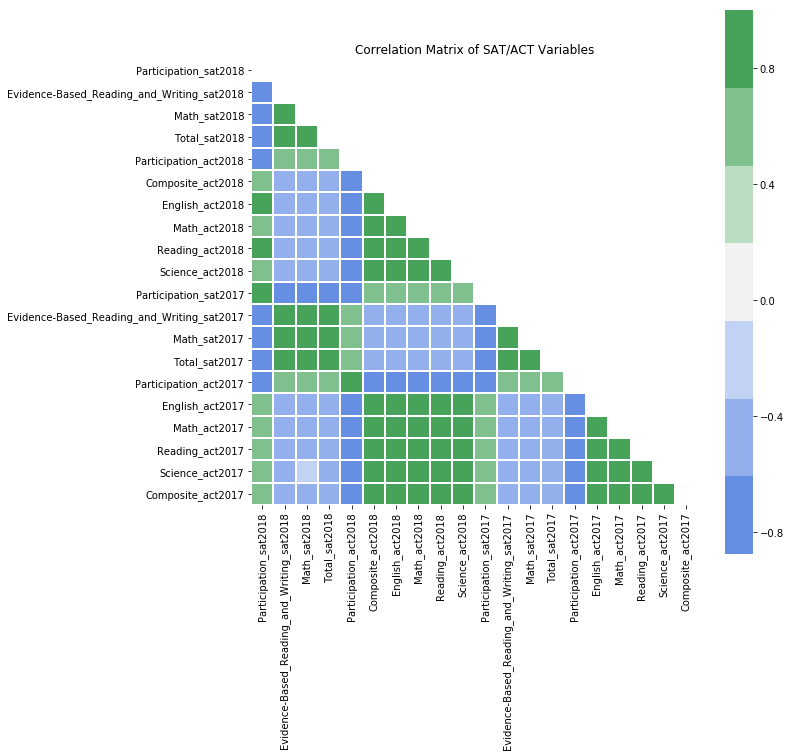

In [65]:
# Setup matplotlib for figure size
plt.figure(figsize = (10,10))
corr = final.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Create diverging color map
cmap = sns.diverging_palette(255, 133, l=60, n=7)
# Plot sns heatmap
sns.heatmap(corr,mask=mask,cmap=cmap,square=True,linewidths=1,vmax=1).set_title("Correlation Matrix of SAT/ACT Variables")

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [66]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (10,10)) # You'll want to specify your figsize

    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=20,ec='black')
        ax[i].title.set_text('Distribution of ' + str(list_of_titles[i]))# feel free to add more settings
        ax[i].set_xlabel(str(list_of_labels[0]))# Set titles, labels, etc here for each subplot
        ax[i].set_ylabel('Count')# Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

### Participation rates for SAT & ACT

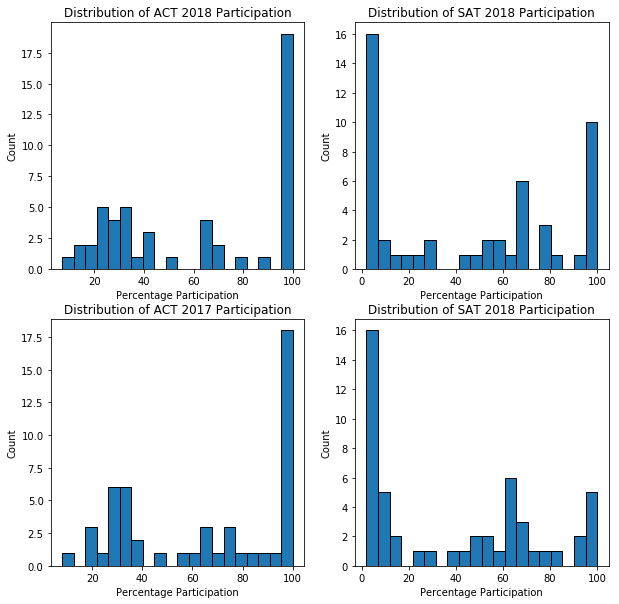

In [67]:
participation_rate_columns = ['Participation_act2018','Participation_sat2018','Participation_act2017','Participation_sat2017']
participation_rate_titles = ['ACT 2018 Participation','SAT 2018 Participation','ACT 2017 Participation','SAT 2018 Participation']
list_of_labels = ['Percentage Participation']

subplot_histograms(final,participation_rate_columns,participation_rate_titles, list_of_labels)


From the ACT distribuions between 2018 and 2017, we see a left skewed distribution with a modal value of greater than 90% whereas in the SAT distribuions, we see a right skewed distribution where the modal value is below 20%. This may indicate that there is a greater ACT participation rate as compared to SATs. This may allow for greater analysis to uncover why ACT is more popular as compared to the SAT.

### Math Scores for SAT & ACT

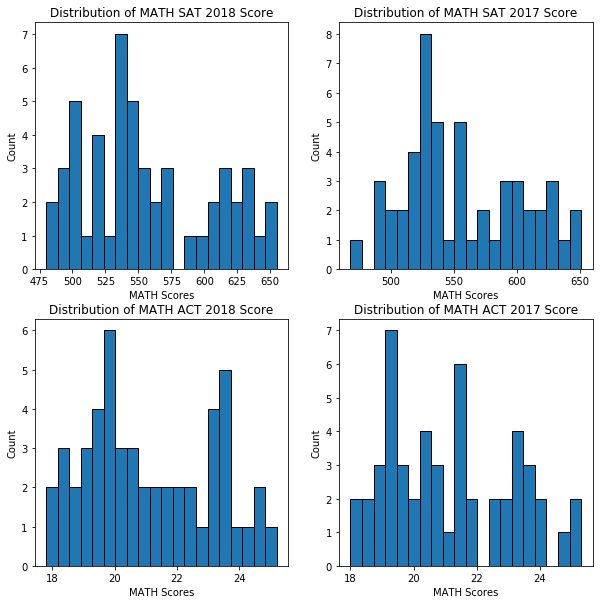

In [68]:
math_columns = ['Math_sat2018','Math_sat2017','Math_act2018','Math_act2017']
math_titles = ['MATH SAT 2018 Score','MATH SAT 2017 Score','MATH ACT 2018 Score','MATH ACT 2017 Score']
list_of_labels = ['MATH Scores']

subplot_histograms(final,math_columns,math_titles, list_of_labels)


In comparing the MATH scores for SAT between the two yers, we can observe that the distribution of the median for 2018 is shifting more towards the right (increasing). This may suggest that SAT scores are improving from the previous year.

For the ACT scores, we also observed a slight shift in the distribution to favour a higher ACT score. 

### Reading/Verbal Scores for SAT & ACT

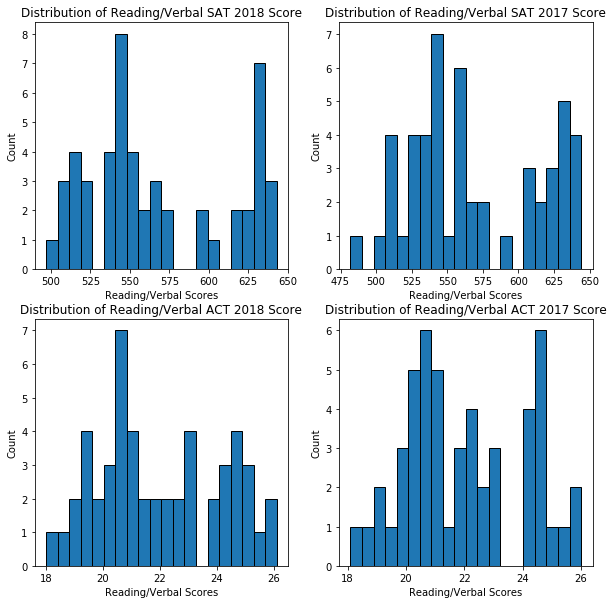

In [69]:
english_columns = ['Evidence-Based_Reading_and_Writing_sat2018','Evidence-Based_Reading_and_Writing_sat2017','Reading_act2018','Reading_act2017']
english_titles = ['Reading/Verbal SAT 2018 Score','Reading/Verbal SAT 2017 Score','Reading/Verbal ACT 2018 Score','Reading/Verbal ACT 2017 Score']
list_of_labels = ['Reading/Verbal Scores']

subplot_histograms(final,english_columns,english_titles, list_of_labels)

For the Reading/Verbal SAT scores, we see a more distinct bimodal distribution when compared to 2017. This is also seen for the ACT scores.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


#### Plot of ACT math against SAT scores for 2017

[Text(0, 0.5, 'Math Scores for ACT'),
 Text(0.5, 0, 'Math Scores for SAT'),
 Text(0.5, 1.0, 'Scatterplot of ACT math scores against SAT math scores')]

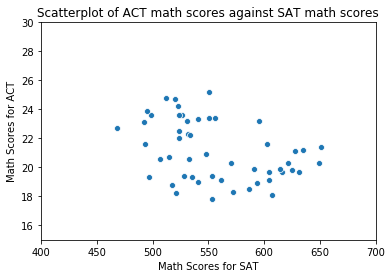

In [70]:
ax_scatter_math = sns.scatterplot(x="Math_sat2017",y="Math_act2018",data=final)  
ax_scatter_math.set_ylim(15, 30)
ax_scatter_math.set_xlim(400, 700)

ax_scatter_math.set(xlabel='Math Scores for SAT', ylabel='Math Scores for ACT',title='Scatterplot of ACT math scores against SAT math scores')

#### Plot of ACT against SAT Verbal/Reading scores for 2017

[Text(0, 0.5, 'Reading Scores for ACT'),
 Text(0.5, 0, 'Verbal/Reading Scores for SAT'),
 Text(0.5, 1.0, 'Scatterplot of ACT math scores against SAT math scores')]

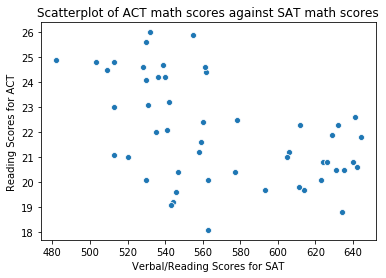

In [71]:
ax_scatter_vr = sns.scatterplot(x="Evidence-Based_Reading_and_Writing_sat2017",y="Reading_act2017",data=final)  
ax_scatter_vr.set(xlabel='Verbal/Reading Scores for SAT', ylabel='Reading Scores for ACT',title='Scatterplot of ACT math scores against SAT math scores')

#### Plot of ACT against SAT Total/Composite scores for 2017

[Text(0, 0.5, 'Composite Scores for ACT'),
 Text(0.5, 0, 'Total Scores for SAT'),
 Text(0.5, 1.0, 'Scatterplot of ACT Composite scores against SAT Total scores')]

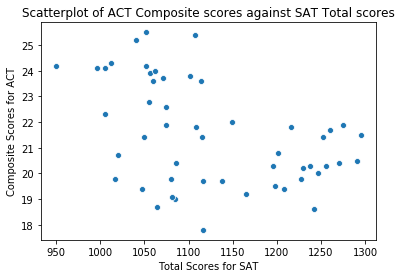

In [72]:
ax_scatter_total_composite = sns.scatterplot(x="Total_sat2017",y="Composite_act2017",data=final)  
ax_scatter_total_composite.set(xlabel='Total Scores for SAT', ylabel='Composite Scores for ACT',title='Scatterplot of ACT Composite scores against SAT Total scores')

#### Total scores for SAT 2017 vs. 2018

[Text(0, 0.5, 'Total Scores for SAT 2018'),
 Text(0.5, 0, 'Total Scores for SAT 2017'),
 Text(0.5, 1.0, 'Scatterplot of SAT Total scores in 2018 against 2017')]

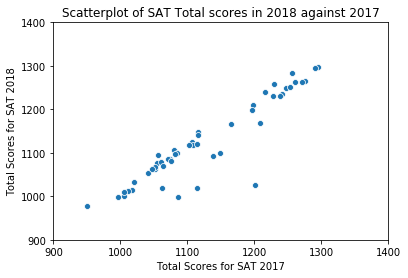

In [73]:
ax_scatter_total_sat = sns.scatterplot(x="Total_sat2017",y="Total_sat2018",data=final)
ax_scatter_total_sat.set_ylim(900, 1400)
ax_scatter_total_sat.set_xlim(900, 1400)
ax_scatter_total_sat.set(xlabel='Total Scores for SAT 2017', ylabel='Total Scores for SAT 2018',title='Scatterplot of SAT Total scores in 2018 against 2017')

#### Composite scores for ACT 2017 vs. 2018


[Text(0, 0.5, 'Composite for ACT 2018'),
 Text(0.5, 0, 'Composite for ACT 2017'),
 Text(0.5, 1.0, 'Scatterplot of ACT Composite scores in 2018 against 2017')]

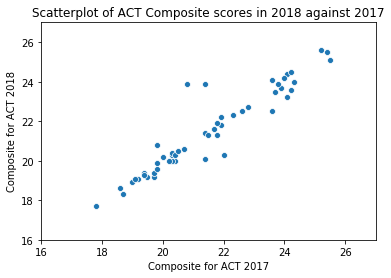

In [74]:
ax_scatter_composite_act = sns.scatterplot(x="Composite_act2017",y="Composite_act2018",data=final)  
ax_scatter_composite_act.set_ylim(16, 27)
ax_scatter_composite_act.set_xlim(16, 27)
ax_scatter_composite_act.set(xlabel='Composite for ACT 2017', ylabel='Composite for ACT 2018',title='Scatterplot of ACT Composite scores in 2018 against 2017')

There is generally positive trend of ACT scores over time.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [75]:
final.columns

Index(['State_sat2018', 'Participation_sat2018',
       'Evidence-Based_Reading_and_Writing_sat2018', 'Math_sat2018',
       'Total_sat2018', 'State_act2018', 'Participation_act2018',
       'Composite_act2018', 'English_act2018', 'Math_act2018',
       'Reading_act2018', 'Science_act2018', 'State_sat2017',
       'Participation_sat2017', 'Evidence-Based_Reading_and_Writing_sat2017',
       'Math_sat2017', 'Total_sat2017', 'State_act2017',
       'Participation_act2017', 'English_act2017', 'Math_act2017',
       'Reading_act2017', 'Science_act2017', 'Composite_act2017'],
      dtype='object')

Text(0, 0.5, 'SAT Component Score')

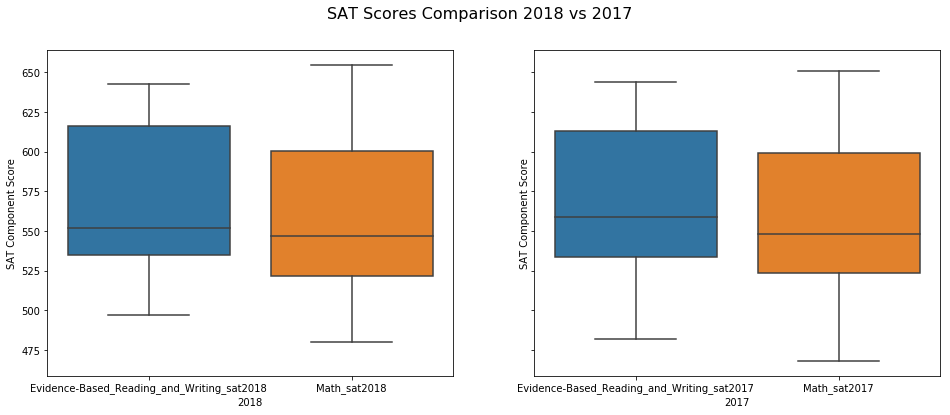

In [98]:
sat_2018_columns = ['Evidence-Based_Reading_and_Writing_sat2018','Math_sat2018']
sat_2017_columns = ['Evidence-Based_Reading_and_Writing_sat2017','Math_sat2017']

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6),sharey=True)
plt.suptitle("SAT Scores Comparison 2018 vs 2017", size=16)
sns.boxplot(data=final.loc[:,sat_2018_columns],ax=ax1)
sns.boxplot(data=final.loc[:,sat_2017_columns],ax=ax2)
ax1.set_xlabel('2018')
ax2.set_xlabel('2017')
ax1.set_ylabel("SAT Component Score")
ax2.set_ylabel("SAT Component Score")

Text(0, 0.5, 'SAT Component Score')

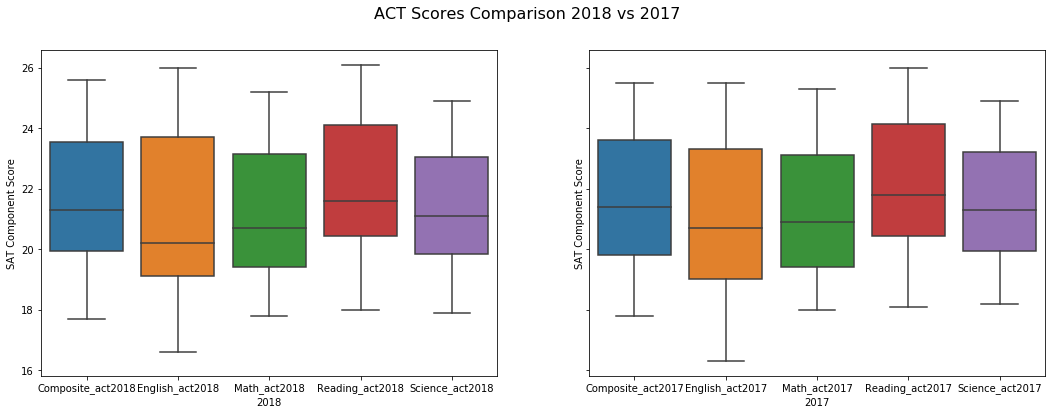

In [100]:
act_2018_columns = ['Composite_act2018', 'English_act2018', 'Math_act2018',
       'Reading_act2018', 'Science_act2018',]
act_2017_columns = ['Composite_act2017', 'English_act2017', 'Math_act2017',
       'Reading_act2017', 'Science_act2017',]

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
plt.suptitle("ACT Scores Comparison 2018 vs 2017", size=16)
sns.boxplot(data=final.loc[:,act_2018_columns],ax=ax1)
sns.boxplot(data=final.loc[:,act_2017_columns],ax=ax2)
ax1.set_xlabel('2018')
ax2.set_xlabel('2017')
ax1.set_ylabel("SAT Component Score")
ax2.set_ylabel("SAT Component Score")


Text(0, 0.5, 'Participation %')

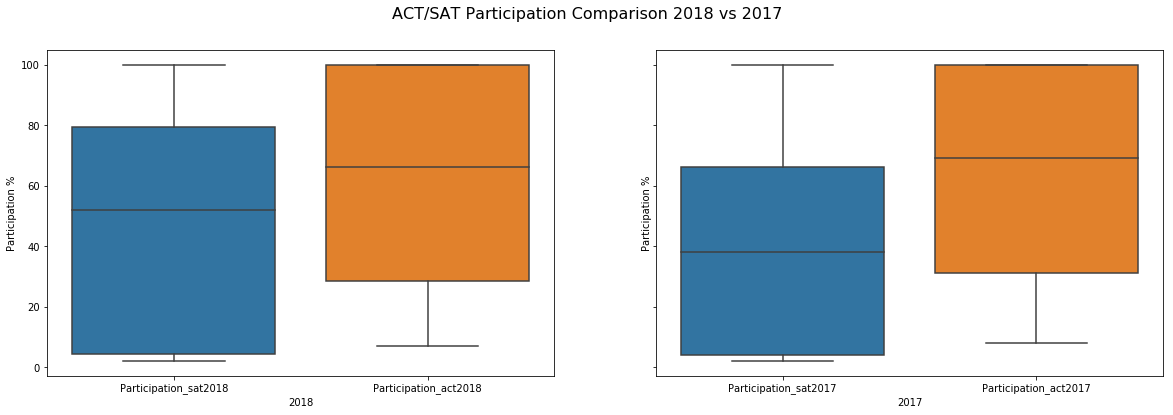

In [97]:
participation_2018_columns = ['Participation_sat2018', 'Participation_act2018']
participation_2017_columns = ['Participation_sat2017', 'Participation_act2017']

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6),sharey=True)
plt.suptitle("ACT/SAT Participation Comparison 2018 vs 2017", size=16)
sns.boxplot(data=final.loc[:,participation_2018_columns],ax=ax1)
sns.boxplot(data=final.loc[:,participation_2017_columns],ax=ax2)
ax1.set_xlabel('2018')
ax2.set_xlabel('2017')
ax1.set_ylabel("Participation %")
ax2.set_ylabel("Participation %")


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

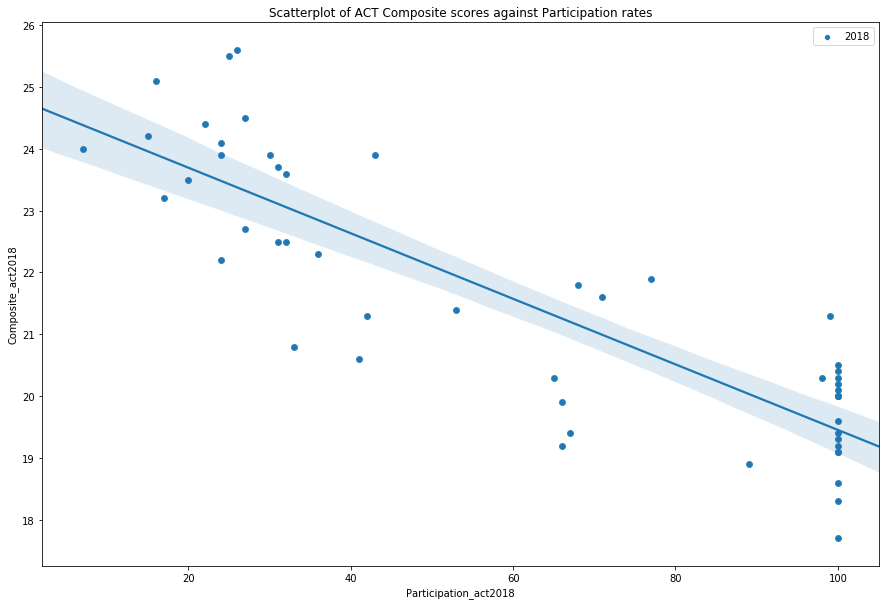

In [78]:
# Explore correlation of components to total, as a factor or participation lowest vs highest
# plot participation against scores
plt.figure(figsize=(15,10))
ax_scatter_composite_act = sns.scatterplot(x="Participation_act2018",y="Composite_act2018",data=final,label="2018")  
ax_scatter_composite_act.set(xlabel='Participation for ACT ', ylabel='Composite Score for ACT',title='Scatterplot of ACT Composite scores against Participation rates')
sns.regplot(x="Participation_act2018",y="Composite_act2018",data=final)
plt.legend()

Higher ACT participation rates do not translate to better performance on scores. From the scatterplot diagram, we can observe that states lower participation scores have a better ACT performance. This can point out to additional factors in candidates that intentionally take the test. For example, candidates that intentionally take ACT in states where it is optional, may already be well prepared for it. 

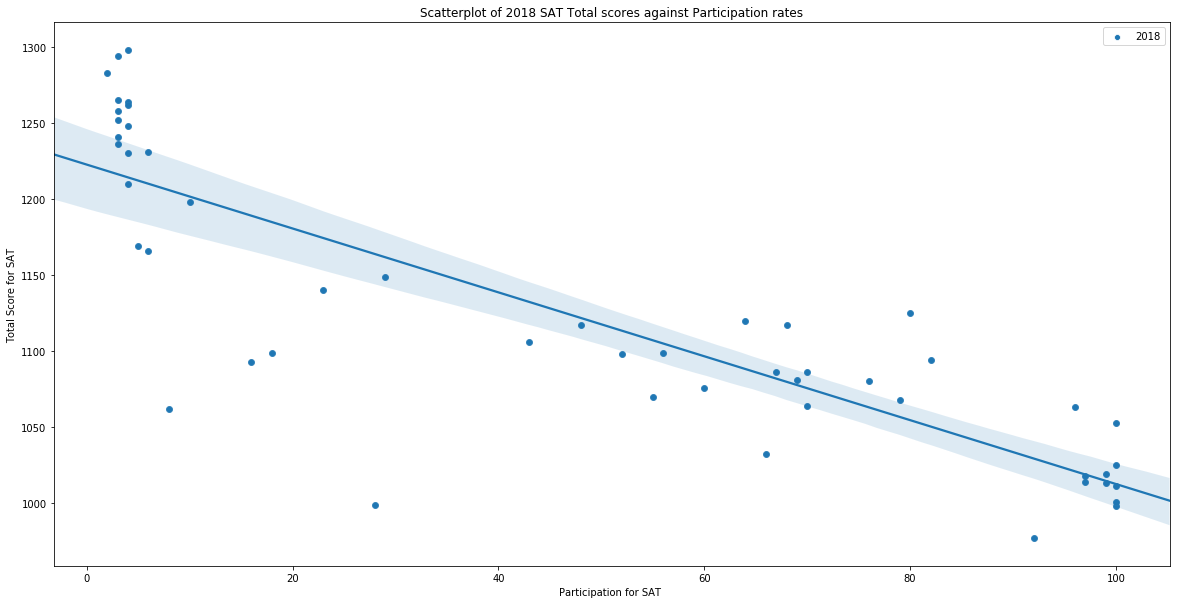

In [79]:
# plot participation against scores (SAT)
plt.figure(figsize=(20,10))
ax_scatter_sat = sns.scatterplot(x="Participation_sat2018",y="Total_sat2018",data=final,label="2018")    
sns.regplot(x="Participation_sat2018",y="Total_sat2018",data=final)
ax_scatter_sat.set(xlabel='Participation for SAT ', ylabel='Total Score for SAT',title='Scatterplot of 2018 SAT Total scores against Participation rates')

plt.legend()

A similar trend is observed - states with lower participation rates tend to reflect higher SAT total scores. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [80]:
final.describe()

,Participation_sat2018,Evidence-Based_Reading_and_Writing_sat2018,Math_sat2018,Total_sat2018,Participation_act2018,Composite_act2018,English_act2018,Math_act2018,Reading_act2018,Science_act2018,Participation_sat2017,Evidence-Based_Reading_and_Writing_sat2017,Math_sat2017,Total_sat2017,Participation_act2017,English_act2017,Math_act2017,Reading_act2017,Science_act2017,Composite_act2017
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,46.627451,567.294118,557.254902,1124.666667,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608
std,38.014187,45.317676,48.887562,93.867069,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695
min,2.000000,497.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.500000,535.000000,521.500000,1062.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,52.000000,552.000000,547.000000,1099.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,79.500000,616.500000,600.500000,1220.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


Answers:
#### 2018 Data

1. Participation_sat2018 : Since the mean (46.6) is below the median, (52.0) the distribution is left-skewed with an inter-quartile range(IQR) of 75 - which is a fairly wide range. 

2. Evidence-Based_Reading_and_Writing_sat2018 : With the mean (567) above the median, (552.0) the distribution is right-skewed with an IQR of of 81.

3. Math_sat2018 : The distribution is right skewed as the mean (557) is greater than the median (547) with an IQR of 79

4. Total_sat2018 : The distribution is right skewed as the mean (1125) is more than the median (1099) with an IQR of 157.5

5. Participation_act2018 : The distribution is left skewed as the mean (61.5) is less than the median (66) with an IQR of 71.5

6. Composite_act2018 : The distribution is right skewed as the mean (21.49) is more than the median (21.3) with an IQR of 3.6

7. English_act2018 : The distribution is right skewed as the mean (20.99) is more than the median (20.2) with an IQR of 4.6

8. Math_act2018 : The distribution is right skewed as the mean (21.125) is more than the median (20.7) with an IQR of 3.75

9. Reading_act2018 : The distribution is right skewed as the mean (22.01) is more than the median (21.6) with an IQR of 3.65

10. Science_act2018 : The distribution is right skewed as the mean (21.35) is more than the median (21.1) with an IQR of 3.2

-----
#### 2017 Data


1. Participation_sat2017 : Since the mean (39.8) is above the median, (38.0) the distribution is left-skewed with an inter-quartile range(IQR) of 62. 

2. Evidence-Based_Reading_and_Writing_sat2017 : With the mean (569) above the median, (559.0) the distribution is right-skewed with an IQR of of 79.5.

3. Math_sat2017 : The distribution is right skewed as the mean (556.9) is greater than the median (548) with an IQR of 79

4. Total_sat2017: The distribution is right skewed as the mean (1126) is more than the median (1107) with an IQR of 156.5

5. Participation_act2017 : The distribution is left skewed as the mean (65.25) is less than the median (69) with an IQR of 69

6. Composite_act2017 : The distribution is right skewed as the mean (21.51) is more than the median (21.4) with an IQR of 3.8

7. English_act2017 : The distribution is right skewed as the mean (20.93) is more than the median (20.7) with an IQR of 4.3

8. Math_act2017 : The distribution is right skewed as the mean (21.18) is more than the median (20.9) with an IQR of 3.77

9. Reading_act2017 : The distribution is right skewed as the mean (22.01) is more than the median (21.8) with an IQR of 3.7

10. Science_act2017 : The distribution is left skewed as the mean (21.04) is less than the median (21.3) with an IQR of 2.85


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

The data is somewhat approximately normal with skews due to the relatively small sample size of 51. This is due to the application of the Central Limit Theorem.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

For Math, Reading and Rates, due to the skew, there is already an inherent uneven distribution of data. This may impact how we assign likelihood of occurances of events from the various random variables.

An example would be in the case of the 2017 SAT participation rates, states that have more than 90% will tend to cause the distribution to skew causing states with <10% participation to be less pronounced. It could be that there are a handful of states with >80% while a number of states are <20% participation.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

No, the data is not normalised to the various student populations in each state. For example, states with a larger population may tend to have a more normal distribution of scores, of which the mean value is reported upwards. Whereas rural states, with their smaller population and, in some cases, lower participation rates may have skewed distributions that are also reported upwards. The aggregation of all the population means without accounting for population size will not make for a fair basis of comparison.


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

SAT and ACT scores when compared across the two test standards, have to be normalised first as the SAT scores are on a scale of 1 to 800 when compared to ACT scores which are on a scale of 1 to 36. At the same time, even with normalisation, there is a caveat that  

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [81]:
# Code:


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

We have thus uncovered key points from the distributions:
1. The ACT has a higher median participation rate when compared to the SAT.
    - This may be due to states that have a contract with the ACT to administer ACT as a requirement which we will attempt to visualise.
2. Florida and Georgia which had >50% in both tests showed a YoY increase of SAT and a decrease in ACT participation rates.
3. 

###  SAT/ACT as State Requirements and Impact to Participation

In this section, we will assess if state-level policies on SAT/ACT preferences as part of high school requirements have an impact on overall participation rates. The image below provides an overview of the 2018 landscape of the SAT/ACT requirements for each state[<sup>4</sup>](#fn4).

<img src="./img/subsidy.png" />

In [82]:
# Load in list of states that require SAT/ACT (as of 2017)
# sourced from https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/
test_requirements = pd.read_csv('./data/state_requirements.csv')

In [83]:
test_requirements.head()

,STATE,REQUIREMENT
0,Alabama,ACT
1,Colorado,SAT
2,Connecticut,SAT
3,Delaware,SAT
4,District of Columbia,SAT


In [84]:
# subset final dataframe to only show participation rates for ACT / SAT
final_subset = final[['State_sat2018','Participation_sat2018','Participation_act2018','Participation_sat2017','Participation_act2017']].copy()

# rename state column
final_subset.rename(index=str, columns={"State_sat2018": "state"},inplace=True)

# match state column name in requirements df
test_requirements.rename(str.lower,axis='columns',inplace=True)


In [85]:
#merge the two DFs
merged_requirements = final_subset.merge(test_requirements,on='state',how='left')

merged_requirements.head()

,state,Participation_sat2018,Participation_act2018,Participation_sat2017,Participation_act2017,requirement
0,Alabama,6,100,5,100,ACT
1,Alaska,43,33,38,65,NaN
2,Arizona,29,66,30,62,NaN
3,Arkansas,5,100,3,100,NaN
4,California,60,27,53,31,NaN


In [86]:
# check types
merged_requirements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 6 columns):
state                    51 non-null object
Participation_sat2018    51 non-null int64
Participation_act2018    51 non-null int64
Participation_sat2017    51 non-null int64
Participation_act2017    51 non-null int64
requirement              25 non-null object
dtypes: int64(4), object(2)
memory usage: 2.8+ KB


In [87]:
# check for what requirements there are
merged_requirements.requirement.unique()

array(['ACT', nan, 'SAT', 'EITHER'], dtype=object)

In [88]:
# convert NaN to 'NA'
merged_requirements['requirement']=merged_requirements.requirement.map(lambda x: 'NA' if str(x) == 'nan' else x)

In [89]:
merged_requirements.groupby('requirement').count().T.loc['state',:]

requirement
ACT       14
EITHER     3
NA        26
SAT        8
Name: state, dtype: int64

For states that do not have SAT as a requirement, what is their partipation rate (2017 vs 2018) when compared to states that do as well as states that allow either one? 

Text(0, 0.5, 'ACT Participation %')

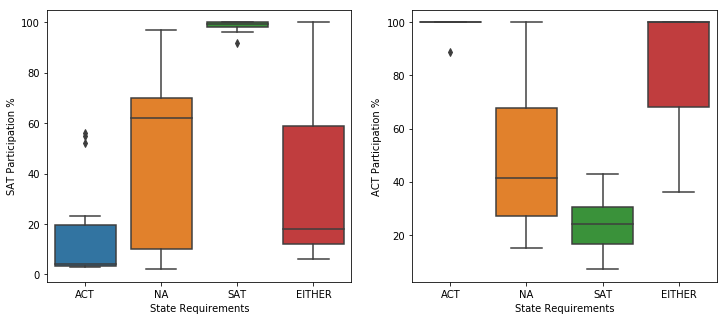

In [90]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
sns.boxplot(x="requirement",y="Participation_sat2018",data=merged_requirements,ax=ax1)
sns.boxplot(x="requirement",y="Participation_act2018",data=merged_requirements,ax=ax2)
ax1.set_xlabel('State Requirements')
ax2.set_xlabel('State Requirements')
ax1.set_ylabel("SAT Participation %")
ax2.set_ylabel("ACT Participation %")


In states where SAT is mandatory, the participation rate is close to 100%. At the same time, for states that do not have either SAT or ACT mandatory, there is a higher tendency for students to prefer ACTs over SATs. 

Text(0.0, 1.0, 'SAT Year on Year Differences by State (Top 5)')

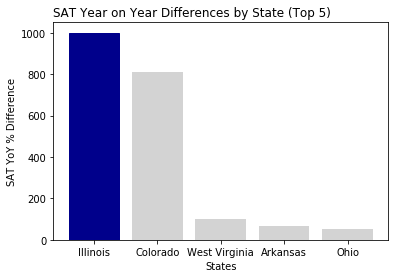

In [91]:
# add in addtional columns to illustration percentage difference YoY
def pct_diff_sat(row):
    
    row['sat_pct_diff'] = round(((row['Participation_sat2018']-row['Participation_sat2017'])\
                        / row['Participation_sat2017'] * 100),2)
    
    return row

filter_chart = merged_requirements.apply(pct_diff_sat,axis=1).sort_values(by=['sat_pct_diff'],ascending=False).head(5)

barplot = plt.bar(x=filter_chart['state'],height=filter_chart['sat_pct_diff'], color = 'lightgrey')
barplot[0].set_color('darkblue')
plt.xlabel('States', fontsize = 10)
plt.ylabel('SAT YoY % Difference', fontsize = 10)
plt.title('SAT Year on Year Differences by State (Top 5)',loc='left')



Text(0.0, 1.0, 'SAT Year on Year Differences by State (Top 5)')

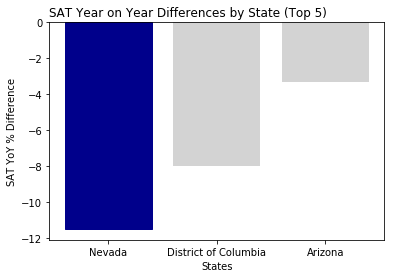

In [92]:
filter_chart = merged_requirements.apply(pct_diff_sat,axis=1).sort_values(by=['sat_pct_diff'],ascending=True).head(3)

barplot = plt.bar(x=filter_chart['state'],height=filter_chart['sat_pct_diff'], color = 'lightgrey')
barplot[0].set_color('darkblue')
plt.xlabel('States', fontsize = 10)
plt.ylabel('SAT YoY % Difference', fontsize = 10)
plt.title('SAT Year on Year Differences by State (Top 5)',loc='left')


States such as Illinois, Colorado and West Virginia saw a marked rise in SAT participation with illinois having a 10 fold increase due to state-level policies that saw SAT being the college exam standard for all public schools in the state[<sup>4<sup>](#fn4).

### Subsidising SAT

In the case of [Florida](#florida) we can see that even though SAT/ACT is not an in-state requirement, we see a 7.65% increase in SATs while ACT participation decreased by 9.65%. Again, subsidies in the form of SAT ['school days'](https://reports.collegeboard.org/archive/sat-suite-program-results/2017/class-2017-results) had a [large influence](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html) on this increase.



### Looking at trends in ACT


Text(0.0, 1.0, 'ACT Year on Year Differences by State (Top 5)')

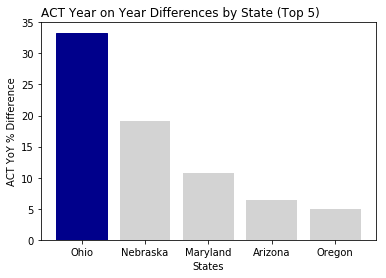

In [93]:
# add in addtional columns to illustration percentage difference YoY
def pct_diff_act(row):    
    row['act_pct_diff'] = round(((row['Participation_act2018']-row['Participation_act2017'])\
                        / row['Participation_act2017'] * 100),2)
    return row

filter_chart = merged_requirements.apply(pct_diff_act,axis=1).sort_values(by=['act_pct_diff'],ascending=False).head(5)
barplot = plt.bar(x=filter_chart['state'],height=filter_chart['act_pct_diff'], color = 'lightgrey')
barplot[0].set_color('darkblue')
plt.xlabel('States', fontsize = 10)
plt.ylabel('ACT YoY % Difference', fontsize = 10)
plt.title('ACT Year on Year Differences by State (Top 5)',loc='left')




Ohio saw the largest trends in ACT participation, but not without a [huge drop](https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/) in ACT scores. Again, the large increase in ACT participation was driven largely due to state policies that [paid for the ACT](https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/) in 2018 for the first time. 


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Key Takeaways

Lowering the barriers to accessibility for the SAT has shown a marked improvement in SAT participation rates for states that previously did not have it. The waiving of SAT fees is one such example of increasing participation. Furthermore coupled with SAT school days where tests are administered during curriculum time as part of schools' assessment schedules, have also encouraged participation.

Looking at Hawaii, with a participation rate of 56% in the SATs and 89% in the ACTs, the SAT board can look into enhancing existing SAT preparation tools that will cater to remote learning requirements. Furthermore intervention via enhancing PSAT (Preliminary SAT) participation for prospective test takers or reducing barriers to entry.

### Additional Data

By Segmenting econometric factors into the SAT test takers population, as well as distance of SAT test takers to their test centers, we can clearly look into the notion of pricing as a factor as well as physical test accesibility as another factor to improve participation. Furthermore, we can cross reference this with similar data from ACT test takers to arrive at a stronger understanding of why some tests are preferred over the other. 

## References
<span id="fn1">1. https://collegereadiness.collegeboard.org/pdf/test-specifications-redesigned-sat-1.pdf</span> <br> 
<span id="fn2">2. https://reports.collegeboard.org/sat-suite-program-results/class-2018-results </span> <br>
<span id="fn3">3. https://www.insidehighered.com/admissions/article/2018/07/16/more-colleges-drop-sat-writing-test-all-eyes-are-california <br>
<span id="fn4">4. https://blogs.edweek.org/edweek/high_school_and_beyond/2018/10/more_than_2_million_students_take_the_sat.html <br>
<span id="fn5">5. Image sourced from [here](https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/) </span>